In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:

games=pd.read_csv('/content/sample_data/games.csv')

In [ ]:
games=games.rename(columns={'Unnamed: 0':'Row'})
games.head(10)

Row                                    Title  Release Date  \
0    0                               Elden Ring  Feb 25, 2022   
1    1                                    Hades  Dec 10, 2019   
2    2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3    3                                Undertale  Sep 15, 2015   
4    4                            Hollow Knight  Feb 24, 2017   
5    5                                Minecraft  Nov 18, 2011   
6    6                                    Omori  Dec 25, 2020   
7    7                            Metroid Dread  Oct 07, 2021   
8    8                                 Among Us  Jun 15, 2018   
9    9                           NieR: Automata  Feb 23, 2017   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   
5                                 ['Mojang Studios']     4.3         2.3K   
6                              ['OMOCAT', 'PLAYISM']     4.2         1.6K   
7                       ['Nintendo', 'MercurySteam']     4.3         2.1K   
8                                     ['InnerSloth']     3.0          867   
9                   ['PlatinumGames', 'Square Enix']     4.3         2.9K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   
5              2.3K                         ['Adventure', 'Simulator']   
6              1.6K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
7              2.1K                          ['Adventure', 'Platform']   
8               867                              ['Indie', 'Strategy']   
9              2.9K                                 ['Brawler', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   
5  Minecraft focuses on allowing the player to ex...   
6  A turn-based surreal horror RPG in which a chi...   
7  Join intergalactic bounty hunter Samus Aran in...   
8  Join your crew-mates in a multiplayer game of ...   
9  NieR: Automata tells the story of androids 2B,...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   
5  ['Minecraft is what you make of it. Unfortunat...   33K    1.8K     1.1K   
6  ["The best game I've played in my life", "omor...  7.2K    1.1K     4.5K   
7  ['Have only been a Metroid fan for couple of y...  9.2K     759     3.4K   
8  ["it's a solid party game. i'm bad at lying th...   25K     470      776   
9  ['Holy shit', 'im carrying the weight of the w...   18K    1.1K     6.2K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K  
5      230  
6     3.8K  
7     3.3K  
8      126  
9     3

In [ ]:
#Replace null values with mean
games['Rating']=games['Rating'].fillna(games['Rating'].mean())
#drop the row which has null summary
games_df=games.dropna(subset=['Summary','Team'],axis=0)

In [ ]:
games_df_standard=games_df.copy()
games_df_standard['Release Date']=pd.to_datetime(games_df_standard['Release Date'], errors='coerce')

In [ ]:
games_df_standard['Release Date']=games_df_standard['Release Date'].fillna(games_df_standard['Release Date'].mode()[0])

In [ ]:
!pip install category-encoders

In [ ]:
# Convert the string representation of the list to a list of strings
games_df_standard['Genres'] = games_df_standard['Genres'].apply(lambda x: eval(x))
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(games_df_standard['Genres']), columns=mlb.classes_)
genres_encoded.columns = ['genre_' + col for col in genres_encoded.columns]
#genres_encoded_dropped = genres_encoded.dropna()
#display(genres_encoded_dropped.head())


In [ ]:
genres_encoded.isnull().sum().sum()

np.int64(0)

In [ ]:
genres_encoded_dropped = genres_encoded.dropna()
display(genres_encoded_dropped.head())

genre_Adventure  genre_Arcade  genre_Brawler  genre_Card & Board Game  \
0                1             0              0                        0   
1                1             0              1                        0   
2                1             0              0                        0   
3                1             0              0                        0   
4                1             0              0                        0   

   genre_Fighting  genre_Indie  genre_MOBA  genre_Music  genre_Pinball  \
0               0            0           0            0              0   
1               0            1           0            0              0   
2               0            0           0            0              0   
3               0            1           0            0              0   
4               0            1           0            0              0   

   genre_Platform  ...  genre_RPG  genre_Racing  genre_Real Time Strategy  \
0               0  ...          1             0                         0   
1               0  ...          1             0                         0   
2               0  ...          1             0                         0   
3               0  ...          1             0                         0   
4               1  ...          0             0                         0   

   genre_Shooter  genre_Simulator  genre_Sport  genre_Strategy  \
0              0                0            0               0   
1              0                0            0               0   
2              0                0            0               0   
3              0                0            0               0   
4              0                0            0               0   

   genre_Tactical  genre_Turn Based Strategy  genre_Visual Novel  
0               0                          0                   0  
1               0                          0                   0  
2               0                          0                   0  
3               0                          1                   0  
4               0                          0                   0  

[5 rows x 23 columns]

In [ ]:
games_df_standard_encoded=pd.concat([games_df_standard, genres_encoded], axis=1)


#games_df_standard_encoded = games_df_standard_encoded.drop('Genres', axis=1)
display(games_df_standard_encoded.head())

Row                                    Title Release Date  \
0  0.0                               Elden Ring   2022-02-25   
1  1.0                                    Hades   2019-12-10   
2  2.0  The Legend of Zelda: Breath of the Wild   2017-03-03   
3  3.0                                Undertale   2015-09-15   
4  4.0                            Hollow Knight   2017-02-24   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                        Genres  \
0              3.9K                              [Adventure, RPG]   
1              2.9K              [Adventure, Brawler, Indie, RPG]   
2              4.3K                              [Adventure, RPG]   
3              3.5K  [Adventure, Indie, RPG, Turn Based Strategy]   
4                3K                  [Adventure, Indie, Platform]   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  ... genre_RPG  \
0  ["The first playthrough of elden ring is one o...  ...       1.0   
1  ['convinced this is a roguelike for people who...  ...       1.0   
2  ['This game is the game (that is not CS:GO) th...  ...       1.0   
3  ['soundtrack is tied for #1 with nier automata...  ...       1.0   
4  ["this games worldbuilding is incredible, with...  ...       0.0   

  genre_Racing genre_Real Time Strategy genre_Shooter  genre_Simulator  \
0          0.0                      0.0           0.0              0.0   
1          0.0                      0.0           0.0              0.0   
2          0.0                      0.0           0.0              0.0   
3          0.0                      0.0           0.0              0.0   
4          0.0                      0.0           0.0              0.0   

   genre_Sport  genre_Strategy  genre_Tactical  genre_Turn Based Strategy  \
0          0.0             0.0             0.0                        0.0   
1          0.0             0.0             0.0                        0.0   
2          0.0             0.0             0.0                        0.0   
3          0.0             0.0             0.0                        1.0   
4          0.0             0.0             0.0                        0.0   

   genre_Visual Novel  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 37 columns]

In [ ]:
games_df_standard_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1245
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row                        1510 non-null   float64       
 1   Title                      1510 non-null   object        
 2   Release Date               1510 non-null   datetime64[ns]
 3   Team                       1510 non-null   object        
 4   Rating                     1510 non-null   float64       
 5   Times Listed               1510 non-null   object        
 6   Number of Reviews          1510 non-null   object        
 7   Genres                     1510 non-null   object        
 8   Summary                    1510 non-null   object        
 9   Reviews                    1510 non-null   object        
 10  Plays                      1510 non-null   object        
 11  Playing                    1510 non-null   object        
 12  Backlogs   

In [ ]:
games_df_standard_encoded.isnull().sum().sum()

np.int64(74)

In [ ]:
games_df_standard_encoded['Genres'].size

1508

In [ ]:
games_df_standard_encoded = games_df_standard_encoded.dropna(axis=0)
display(games_df_standard_encoded.head())

Row                                    Title Release Date  \
0  0.0                               Elden Ring   2022-02-25   
1  1.0                                    Hades   2019-12-10   
2  2.0  The Legend of Zelda: Breath of the Wild   2017-03-03   
3  3.0                                Undertale   2015-09-15   
4  4.0                            Hollow Knight   2017-02-24   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                        Genres  \
0              3.9K                              [Adventure, RPG]   
1              2.9K              [Adventure, Brawler, Indie, RPG]   
2              4.3K                              [Adventure, RPG]   
3              3.5K  [Adventure, Indie, RPG, Turn Based Strategy]   
4                3K                  [Adventure, Indie, Platform]   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  ... genre_RPG  \
0  ["The first playthrough of elden ring is one o...  ...       1.0   
1  ['convinced this is a roguelike for people who...  ...       1.0   
2  ['This game is the game (that is not CS:GO) th...  ...       1.0   
3  ['soundtrack is tied for #1 with nier automata...  ...       1.0   
4  ["this games worldbuilding is incredible, with...  ...       0.0   

  genre_Racing genre_Real Time Strategy genre_Shooter  genre_Simulator  \
0          0.0                      0.0           0.0              0.0   
1          0.0                      0.0           0.0              0.0   
2          0.0                      0.0           0.0              0.0   
3          0.0                      0.0           0.0              0.0   
4          0.0                      0.0           0.0              0.0   

   genre_Sport  genre_Strategy  genre_Tactical  genre_Turn Based Strategy  \
0          0.0             0.0             0.0                        0.0   
1          0.0             0.0             0.0                        0.0   
2          0.0             0.0             0.0                        0.0   
3          0.0             0.0             0.0                        1.0   
4          0.0             0.0             0.0                        0.0   

   genre_Visual Novel  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 37 columns]

In [ ]:
games_df_standard_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 1509
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row                        1508 non-null   float64       
 1   Title                      1508 non-null   object        
 2   Release Date               1508 non-null   datetime64[ns]
 3   Team                       1508 non-null   object        
 4   Rating                     1508 non-null   float64       
 5   Times Listed               1508 non-null   object        
 6   Number of Reviews          1508 non-null   object        
 7   Genres                     1508 non-null   object        
 8   Summary                    1508 non-null   object        
 9   Reviews                    1508 non-null   object        
 10  Plays                      1508 non-null   object        
 11  Playing                    1508 non-null   object        
 12  Backlogs   

In [ ]:
vgsales=pd.read_csv('/content/sample_data/vgsales.csv')

In [ ]:
#vgsales Data cleaning
vgsales['Year']=vgsales['Year'].fillna(vgsales['Year'].mode()[0])

In [ ]:
# Fill missing 'Publisher' values with the mode
vgsales['Publisher']=vgsales['Publisher'].fillna(vgsales['Publisher'].mode()[0])

In [ ]:
#Apply one hot encoding for categorical columns
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Genre','Platform'],handle_unknown='return-nan',return_df=True,use_cat_names=True)

In [ ]:
encoded_vgsales=encoder.fit_transform(vgsales[['Genre','Platform']])

In [ ]:
final_encoded_vgsales =  pd.concat([ vgsales, encoded_vgsales], axis=1)

In [ ]:
final_encoded_vgsales.isnull().sum().sum()

np.int64(0)

In [ ]:
final_encoded_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                16598 non-null  int64  
 1   Name                16598 non-null  object 
 2   Platform            16598 non-null  object 
 3   Year                16598 non-null  float64
 4   Genre               16598 non-null  object 
 5   Publisher           16598 non-null  object 
 6   NA_Sales            16598 non-null  float64
 7   EU_Sales            16598 non-null  float64
 8   JP_Sales            16598 non-null  float64
 9   Other_Sales         16598 non-null  float64
 10  Global_Sales        16598 non-null  float64
 11  Genre_Sports        16598 non-null  int64  
 12  Genre_Platform      16598 non-null  int64  
 13  Genre_Racing        16598 non-null  int64  
 14  Genre_Role-Playing  16598 non-null  int64  
 15  Genre_Puzzle        16598 non-null  int64  
 16  Genr

Final data frames ::::
final_encoded_vgsales :::::
games_df_standard_encoded

In [ ]:
#21.Which game genres generate the most global sales?
genre_sales = final_encoded_vgsales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
#display(genre_sales)
fig = px.bar(genre_sales,
               x='Genre',
               y='Global_Sales',
               title='Most Global Sales',
                color_discrete_sequence=['brown'])
fig.show()

In [ ]:
#22.🎯 How does user rating affect global sales?

In [ ]:
merged_games_data = pd.merge(games_df_standard_encoded, final_encoded_vgsales, left_on='Title', right_on='Name', how='inner',sort=True)

In [ ]:
merged_games_data

Row                            Title Release Date  \
0     1315.0                     Advance Wars   2001-09-10   
1     1011.0                        Alan Wake   2010-05-14   
2     1011.0                        Alan Wake   2010-05-14   
3     1131.0           Alice: Madness Returns   2011-06-14   
4     1131.0           Alice: Madness Returns   2011-06-14   
...      ...                              ...          ...   
1331  1111.0       Ys VIII: Lacrimosa of Dana   2016-07-21   
1332  1306.0         Ys: The Oath in Felghana   2005-07-04   
1333   313.0  Zelda II: The Adventure of Link   1987-01-14   
1334   637.0   Zero Escape: Zero Time Dilemma   2016-06-28   
1335   637.0   Zero Escape: Zero Time Dilemma   2016-06-28   

                                                   Team  Rating Times Listed  \
0         ['Nintendo', 'Intelligent Systems Co., Ltd.']     3.7          266   
1     ['Microsoft Game Studios', 'Remedy Entertainme...     3.6          702   
2     ['Microsoft Game Studios', 'Remedy Entertainme...     3.6          702   
3              ['Electronic Arts', 'Spicy Horse Games']     3.5          358   
4              ['Electronic Arts', 'Spicy Horse Games']     3.5          358   
...                                                 ...     ...          ...   
1331                    ['NIS America', 'Nihon Falcom']     4.2          620   
1332                    ['Nihon Falcom', 'XSEED Games']     4.0          311   
1333                       ['Nintendo', 'Nintendo EAD']     2.6          756   
1334                  ['Aksys Games', 'Spike ChunSoft']     3.0          350   
1335                  ['Aksys Games', 'Spike ChunSoft']     3.0          350   

     Number of Reviews                                             Genres  \
0                  266  [Simulator, Strategy, Tactical, Turn Based Str...   
1                  702                               [Adventure, Shooter]   
2                  702                               [Adventure, Shooter]   
3                  358                     [Adventure, Brawler, Platform]   
4                  358                     [Adventure, Brawler, Platform]   
...                ...                                                ...   
1331               620                                   [Adventure, RPG]   
1332               311                                   [Adventure, RPG]   
1333               756                                   [Adventure, RPG]   
1334               350   [Adventure, Puzzle, RPG, Strategy, Visual Novel]   
1335               350   [Adventure, Puzzle, RPG, Strategy, Visual Novel]   

                                                Summary  \
0     Just because this battle fits in the palm of y...   
1     Presented in the style of a TV series, Alan Wa...   
2     Presented in the style of a TV series, Alan Wa...   
3     Return to Wonderland and experience an all new...   
4     Return to Wonderland and experience an all new...   
...                                                 ...   
1331  Ys returns with a brand new adventure for the ...   
1332  A complete 3D reimagining of the 16-bit consol...   
1333  Zelda II: The Adventure of Link is the second ...   
1334  Zero Time Dilemma is the third and final entry...   
1335  Zero Time Dilemma is the third and final entry...   

                                                Reviews  ... Platform_DC  \
0     ['que mitada', 'always feels like a great pers...  ...           0   
1     ["One of the first games I played on the Xbox ...  ...           0   
2     ["One of the first games I played on the Xbox ...  ...           0   
3     ['it really should be right up my alley, but s...  ...           0   
4     ['it really should be right up my alley, but s...  ...           0   
...                                                 ...  ...         ...   
1331  ["Ys VIII ties a very fun to explore island wi...  ...           0   
1332  ['Este jogo foi feito exclusivamente para me i...  ... 

In [ ]:
display(merged_games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row                        1336 non-null   float64       
 1   Title                      1336 non-null   object        
 2   Release Date               1336 non-null   datetime64[ns]
 3   Team                       1336 non-null   object        
 4   Rating                     1336 non-null   float64       
 5   Times Listed               1336 non-null   object        
 6   Number of Reviews          1336 non-null   object        
 7   Genres                     1336 non-null   object        
 8   Summary                    1336 non-null   object        
 9   Reviews                    1336 non-null   object        
 10  Plays                      1336 non-null   object        
 11  Playing                    1336 non-null   object        
 12  Backlo

None

In [ ]:
#22.How does user rating affect global sales?
#The scatter plot shows the relationship between user rating and global sales.
import plotly.express as px

fig = px.scatter(merged_games_data, x='Rating', y='Global_Sales', title='User Rating vs. Global Sales', hover_name='Title')
fig.show()

In [ ]:
#23.Which platforms have the most games with high ratings (e.g., above 4)?
high_rating_games = merged_games_data[merged_games_data['Rating'] > 4]
platform_high_rating_counts = high_rating_games['Platform'].value_counts().reset_index()
platform_high_rating_counts.columns = ['Platform', 'Number of Games with Rating > 4']
fig = px.bar(platform_high_rating_counts, x='Platform', y='Number of Games with Rating > 4', title='Platforms with Most Games with Rating > 4')
fig.show()

In [ ]:
#2.4What’s the trend of releases and sales over time?
#Line Chart help us to visualize the trend of release and sales over time
release=merged_games_data.groupby('Release Date')['Global_Sales'].sum().reset_index()
release.columns = ['Release', 'Global_Sales']

fig = px.line(release, x='Release', y='Global_Sales', title='Trend of Releases and Sales over time')
fig.show()

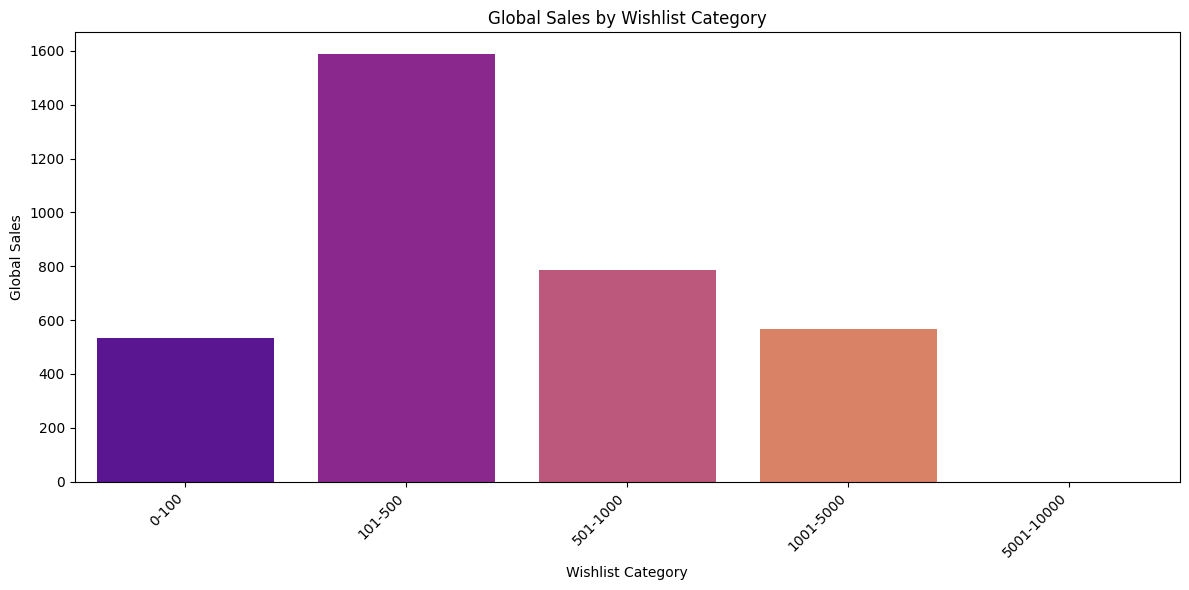

In [ ]:
#25.Do highly wishlisted games lead to more sales?
# Convert 'Wishlist' to numeric, coercing errors to NaN
merged_games_data['Wishlist_numeric'] = merged_games_data['Wishlist'].str.replace('K', 'e3').astype(float)

# Create bins for 'Wishlist_numeric'
bins = [0, 100, 500, 1000, 5000, 10000]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000']
merged_games_data['Wishlist_category'] = pd.cut(merged_games_data['Wishlist_numeric'], bins=bins, labels=labels, right=False)

# Group by the new wishlist category and sum global sales
highlywishlisted_grouped = merged_games_data.groupby('Wishlist_category')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Wishlist_category',y='Global_Sales',hue='Wishlist_category',data=highlywishlisted_grouped,palette='plasma',legend=False)
plt.title('Global Sales by Wishlist Category')
plt.xlabel('Wishlist Category')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 26.Which genres have the highest engagement but lowest sales?
# The 'Genres' column is a list of strings, which causes the TypeError
# We need to process the 'Genres' column to count the occurrences of each genre.
# One way is to explode the list of genres so each genre in a list becomes a row.
exploded_genres = merged_games_data.explode('Genres')

# Now we can count the occurrences of each genre and sum the global sales for each genre
genre_engagement_sales = exploded_genres.groupby('Genres')['Global_Sales'].agg(['count', 'sum']).reset_index()
genre_engagement_sales.columns = ['Genre', 'Engagement (Count)', 'Total Global Sales']

# Calculate engagement to sales ratio (handling division by zero)
genre_engagement_sales['Engagement_to_Sales_Ratio'] = genre_engagement_sales.apply(
    lambda row: row['Engagement (Count)'] / row['Total Global Sales'] if row['Total Global Sales'] > 0 else 0,
    axis=1
)

# Sort by engagement to sales ratio to find genres with high engagement and low sales
highest_engagement_lowest_sales = genre_engagement_sales.sort_values(by='Engagement_to_Sales_Ratio', ascending=False)

display(highest_engagement_lowest_sales)

Genre  Engagement (Count)  Total Global Sales  \
5                 Indie                  30                3.87   
8       Point-and-Click                  32               17.45   
19         Visual Novel                  24               15.54   
12   Real Time Strategy                   9                7.81   
16             Strategy                  71               67.48   
2               Brawler                 153              198.58   
4              Fighting                  55               95.13   
10                  RPG                 375              667.13   
9                Puzzle                 125              251.42   
6                 Music                  13               26.66   
17             Tactical                  46               95.71   
0             Adventure                 864             1988.97   
3     Card & Board Game                   4                9.38   
18  Turn Based Strategy                  26               60.98   
13              Shooter                 468             1155.61   
7              Platform                 294              890.50   
1                Arcade                  25              120.34   
11               Racing                  59              293.89   
14            Simulator                  69              421.47   
15                Sport                  35              281.99   

    Engagement_to_Sales_Ratio  
5                    7.751938  
8                    1.833811  
19                   1.544402  
12                   1.152369  
16                   1.052164  
2                    0.770470  
4                    0.578156  
10                   0.562109  
9                    0.497176  
6                    0.487622  
17                   0.480619  
0                    0.434396  
3                    0.426439  
18                   0.426369  
13                   0.404981  
7                    0.330152  
1                    0.207745  
11                   0.200755  
14                   0.163713  
15                   0.124118

In [ ]:
import plotly.express as px

# Plot the Engagement to Sales Ratio
fig = px.bar(highest_engagement_lowest_sales,
             x='Genre',
             y='Engagement_to_Sales_Ratio',
             title='Genres with Highest Engagement to Lowest Sales Ratio',
             labels={'Engagement_to_Sales_Ratio': 'Engagement to Sales Ratio'},
             color='Engagement_to_Sales_Ratio',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
#27.Do highly listed games (wishlist/backlogs) correlate with better ratings?
def convert_k_to_numeric(k_str):
    """Converts string with 'K' to numeric."""
    if isinstance(k_str, str) and 'K' in k_str:
        return float(k_str.replace('K', '')) * 1000
    elif pd.isna(k_str): # Handle NaN values
        return np.nan
    return float(k_str)

games_df_standard_encoded['Wishlist_numeric'] = games_df_standard_encoded['Wishlist'].apply(convert_k_to_numeric)
games_df_standard_encoded['Backlogs_numeric'] = games_df_standard_encoded['Backlogs'].apply(convert_k_to_numeric)

#Visualize relationship between  Wishlist & Backlogs(two continuous) variables using Scatter plot, colored by Rating
import plotly.express as px

fig = px.scatter(games_df_standard_encoded,
                 x='Wishlist_numeric',
                 y='Backlogs_numeric',
                 color='Rating', # Color the points by Rating
                 hover_name='Title',  # Show game title on hover
                 title='Wishlist vs Backlogs for Games (Colored by Rating)')

fig.update_layout(xaxis_title='Wishlist (numeric)',
                  yaxis_title='Backlogs (numeric)')

fig.show()



In [ ]:
#28. How does user engagement differ across genres?

#Refer above cell for engagement value
# Plot user engagement (count of games) across genres
fig = px.bar(genre_engagement_sales,
             x='Genre',
             y='Engagement (Count)',
             title='User Engagement (Number of Games) Across Genres',
             labels={'Engagement (Count)': 'Number of Games'},
             color='Engagement (Count)',
             color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
#29.What are the top-performing combinations of Genre + Platform?
top_genre_platform=merged_games_data.groupby('Genre')['Platform'].value_counts().sort_values(ascending=False).reset_index(name='Count')
fig = px.bar(top_genre_platform,
             x='Platform',
             y=['Genre', 'Count'],
             barmode='group',
             color='Genre',
             title='Regional Sales Comparison by Platform')
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
#30.What does a regional sales heatmap by genre reveal?

regional_sales = merged_games_data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
regional_sales_by_genre = merged_games_data.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

import plotly.graph_objects as go


fig = go.Figure(data=go.Heatmap(
                   z=regional_sales_by_genre.values,
                   x=regional_sales_by_genre.columns,
                   y=regional_sales_by_genre.index,
                   colorscale='Viridis'))

fig.update_layout(
    title='Regional Sales Heatmap by Genre',
    xaxis_title='Region',
    yaxis_title='Genre'
)

fig.show()